In [1]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import scipy.ndimage
import random
random.seed(1)

In [2]:
main = "/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/"
path_500M = main + "4_4_shifted_ATAC_09.16.2021_subsample_500M/with_gm12878_bias_final_model/unplug/deepshap/"
path_100M = main + "4_4_shifted_ATAC_09.16.2021_subsample_100M/with_gm12878_bias_final_model/unplug/deepshap/"
path_25M = main + "4_4_shifted_ATAC_09.16.2021_subsample_25M/with_gm12878_bias_final_model/unplug/deepshap/"
path_5M = main + "4_4_shifted_ATAC_09.16.2021_subsample_5M/with_gm12878_bias_final_model/unplug/deepshap/"

data_500M = pkl.load(open(path_500M+"20K.fold0.deepSHAP", "rb"))
data_100M = pkl.load(open(path_100M+"20K.fold0.deepSHAP", "rb"))
data_25M = pkl.load(open(path_25M+"20K.fold0.deepSHAP", "rb"))
data_5M = pkl.load(open(path_5M+"20K.fold0.deepSHAP", "rb"))

In [3]:
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import scipy.ndimage

In [11]:

def get_pairwise_metrics(array_1, array_2, type_key, input_keys=None, smoothing_flag=False):
    jsd_corr=[]
    
    if input_keys==None:
        input_keys=array_2["seq"].keys()
        
    for region in input_keys:
        if "shap" in type_key:
            array_1_sig = array_1[type_key][region]*array_1["seq"][region]
            array_2_sig = array_2[type_key][region]*array_2["seq"][region]
            
            array_1_sig = np.sum(array_1_sig,axis=1)
            array_2_sig = np.sum(array_2_sig,axis=1)
        else:
            array_1_sig = array_1[type_key][region]
            array_2_sig = array_2[type_key][region]

        array_1_sig = np.abs(array_1_sig)
        array_2_sig = np.abs(array_2_sig)
            
        #array_1_sig = array_1_sig / np.sum(array_1_sig)
        #array_2_sig = array_2_sig / np.sum(array_2_sig)
        
        if smoothing_flag:
            array_1_sig = scipy.ndimage.gaussian_filter1d(array_1_sig, 7, truncate=(80 / 14))
            array_2_sig = scipy.ndimage.gaussian_filter1d(array_2_sig, 7, truncate=(80 / 14))


        jsd_corr.append(jensenshannon(array_1_sig, array_2_sig))

    return np.array(jsd_corr)

input_key_list=data_500M["seq"].keys()  

input_key_list=data_500M["seq"].keys()       

In [6]:
print(len(input_key_list))

30000


In [12]:
count_shap_100M_vs_500M = get_pairwise_metrics(data_100M, data_500M, type_key="count_shap", input_keys=input_key_list, smoothing_flag=False)
count_shap_25M_vs_500M = get_pairwise_metrics(data_25M, data_500M, type_key="count_shap", input_keys=input_key_list, smoothing_flag=False)
count_shap_5M_vs_500M = get_pairwise_metrics(data_5M, data_500M, type_key="count_shap", input_keys=input_key_list, smoothing_flag=False)


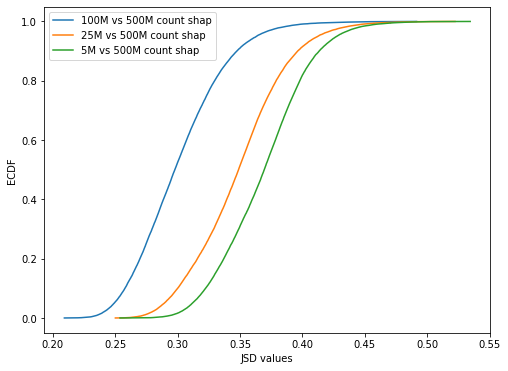

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(8, 6))
ecdf = ECDF(count_shap_100M_vs_500M)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M count shap")
ecdf = ECDF(count_shap_25M_vs_500M)
plt.plot(ecdf.x, ecdf.y,label="25M vs 500M count shap")
ecdf = ECDF(count_shap_5M_vs_500M)
plt.plot(ecdf.x, ecdf.y,label="5M vs 500M count shap")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()





In [15]:
profile_shap_100M_vs_500M = get_pairwise_metrics(data_100M, data_500M, type_key="profile_shap", input_keys=input_key_list, smoothing_flag=False)
profile_shap_25M_vs_500M = get_pairwise_metrics(data_25M, data_500M, type_key="profile_shap", input_keys=input_key_list, smoothing_flag=False)
profile_shap_5M_vs_500M = get_pairwise_metrics(data_5M, data_500M, type_key="profile_shap", input_keys=input_key_list, smoothing_flag=False)


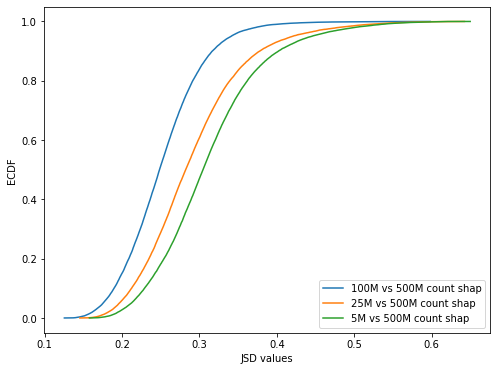

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize=(8, 6))
ecdf = ECDF(profile_shap_100M_vs_500M)
plt.plot(ecdf.x, ecdf.y,label="100M vs 500M count shap")
ecdf = ECDF(profile_shap_25M_vs_500M)
plt.plot(ecdf.x, ecdf.y,label="25M vs 500M count shap")
ecdf = ECDF(profile_shap_5M_vs_500M)
plt.plot(ecdf.x, ecdf.y,label="5M vs 500M count shap")
plt.legend()
plt.xlabel("JSD values")
plt.ylabel("ECDF")
plt.show()

In [21]:
#label_100M_vs_500M = get_pairwise_metrics(data_100M, data_500M, type_key="label_prof", input_keys=input_key_list, smoothing_flag=False)
#label_25M_vs_500M = get_pairwise_metrics(data_25M, data_500M, type_key="label_prof", input_keys=input_key_list, smoothing_flag=False)
#label_5M_vs_500M = get_pairwise_metrics(data_5M, data_500M, type_key="label_prof", input_keys=input_key_list, smoothing_flag=False)
